# Chap 11 - Ex1: find groups for data ex1.csv
## Use KMeansClustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
ex1 = pd.read_csv('Data/ex1.csv', index_col = 0)
ex1

,A,B
0,-2.752676,1.792717
1,-0.135687,2.176315
2,-2.075631,2.292046
3,0.008330,2.225736
4,-2.897468,1.878708
...,...,...
95,-0.205132,2.425699
96,0.525010,2.842496
97,0.194601,1.876916
98,-2.826466,2.072017


In [3]:
ex1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    float64
 1   B       100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [4]:
ex1.describe()

,A,B
count,100.000000,100.000000
mean,-1.384177,2.129132
std,1.243764,0.366103
min,-2.960748,1.516132
25%,-2.757180,1.834512
50%,-1.490198,2.110086
75%,-0.063247,2.381674
max,0.831685,3.040911


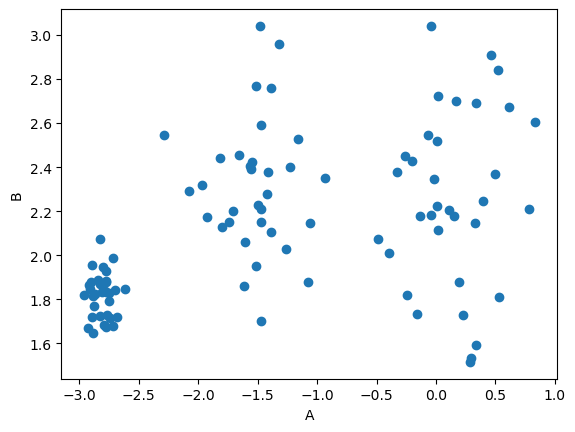

In [5]:
plt.scatter(ex1.A, ex1.B)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

## <span style = 'color:yellow'> Build KMeansClustering

Silhouette score for k = 2: 0.617534179201355
Silhouette score for k = 3: 0.416388547787369
Silhouette score for k = 4: 0.593153962390628
Silhouette score for k = 5: 0.5034956971725999


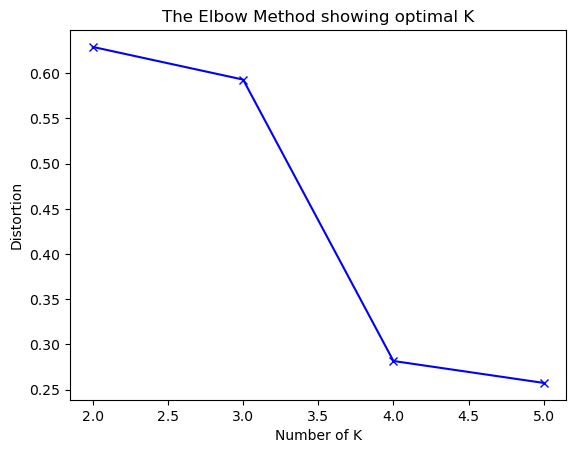


Choose K = 3


In [6]:
#Use elbow method to find optimal K

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

distortions = []
k_nums = range(2,6)

for k in k_nums:
    kmeansModel = KMeans(n_clusters = k).fit(ex1)
    distortions.append(sum(np.min(cdist(ex1, kmeansModel.cluster_centers_, 'euclidean'), axis = 1)) / ex1.shape[0])
    print(f'Silhouette score for k = {k}: {silhouette_score(ex1, kmeansModel.labels_)}')

plt.plot(k_nums, distortions, 'bx-')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

print('\nChoose K = 3')

Coordinate of all centroids:
 [[-2.81009409  1.81832943]
 [ 0.13918152  2.25321416]
 [-1.52778005  2.31209379]]

           A         B  Group
0  -2.752676  1.792717      0
1  -0.135687  2.176315      1
2  -2.075631  2.292046      2
3   0.008330  2.225736      1
4  -2.897468  1.878708      0
..       ...       ...    ...
95 -0.205132  2.425699      1
96  0.525010  2.842496      1
97  0.194601  1.876916      1
98 -2.826466  2.072017      0
99  0.459075  2.909212      1

[100 rows x 3 columns]



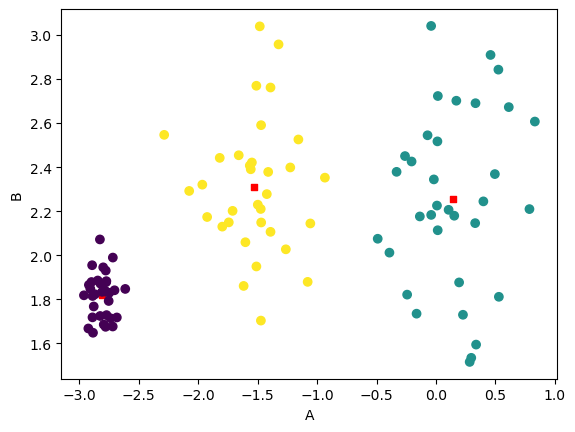

In [7]:
# Build officil KMeans model with K = 3

kmeansModel = KMeans(n_clusters = 3).fit(ex1)
centroids = kmeansModel.cluster_centers_
labels = kmeansModel.labels_

print('Coordinate of all centroids:\n', centroids)

ex1_group = ex1.copy()
ex1_group.insert(2, 'Group', labels)
print()
print(ex1_group)
print()

plt.scatter(centroids[:,0], centroids[:,1], marker = 's', s = 20, color = 'red')
plt.scatter(ex1_group.A, ex1_group.B, c = ex1_group.Group)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

# <span style = 'color:yellow'> Report clustering results:

In [8]:
data_group = ex1_group.copy()

for group in data_group['Group'].unique():
    print(f'\n=============== Cluster group {group} =========================\n')
    data = data_group[data_group['Group'] == group]
    print(f'n_observations: {data.shape[0]}\n')
    for col_name in data.columns[:-1]:
        print(f'{col_name}: {np.min(data[col_name])} ~ {np.median(data[col_name])} ~ {np.max(data[col_name])}')
        print()


=============== Cluster group 0 =========================

n_observations: 33

A: -2.9607483234561225 ~ -2.798699810812209 ~ -2.613422548885524

B: 1.6485152775314136 ~ 1.8341151974816643 ~ 2.0720169166589617


=============== Cluster group 1 =========================

n_observations: 34

A: -0.4899671330052131 ~ 0.13003966857768465 ~ 0.8316851262029565

B: 1.5161319504480897 ~ 2.2177129445699295 ~ 3.040911273803575


=============== Cluster group 2 =========================

n_observations: 33

A: -2.2859235312269237 ~ -1.4984659630072616 ~ -0.934144229636841

B: 1.703729325619732 ~ 2.292045837365235 ~ 3.0389726337455856



Number of numeric fields: 2

All numeric fields: ['A', 'B']



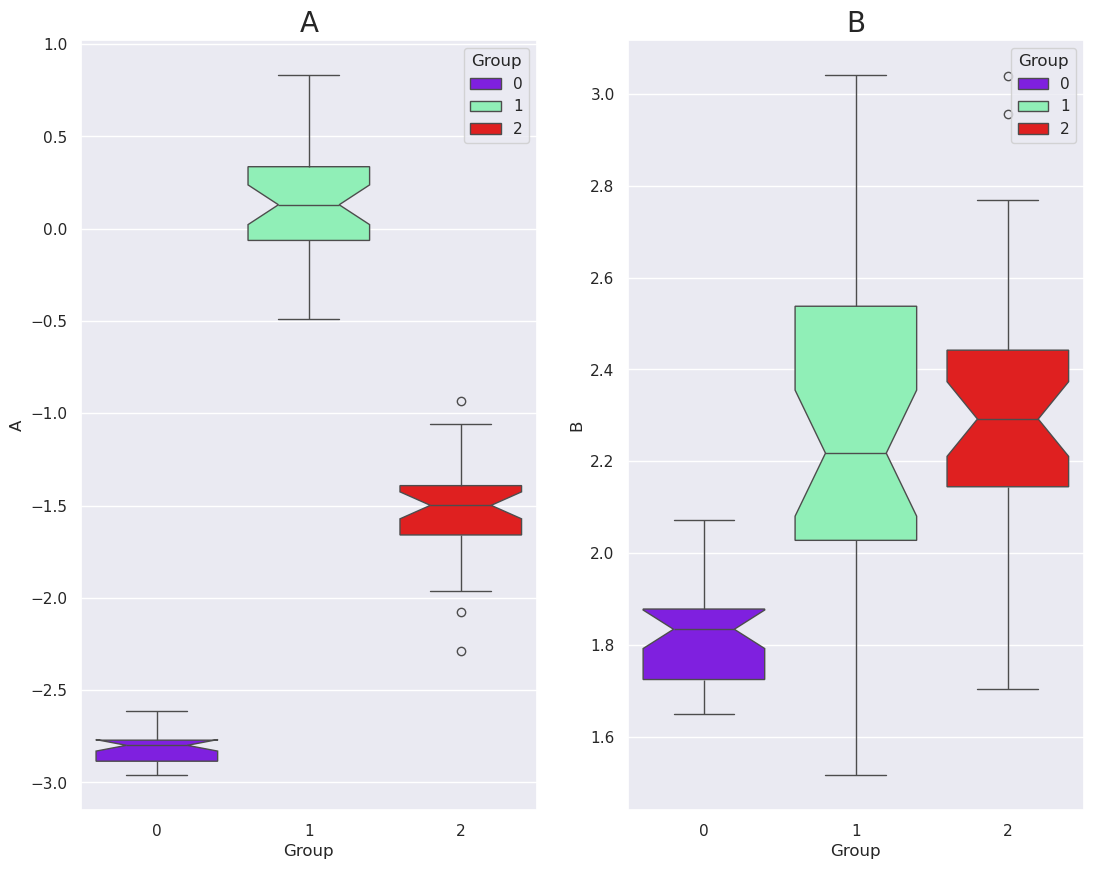

In [16]:
data_group = ex1_group.copy()

numeric_cols = ['A', 'B']

##### Function building ##############

def boxplot_numeric(df, numeric_cols, figsize=(20, 10), groups = None):
    col = 3
    if (len(numeric_cols) % 3) == 0:
        row = len(numeric_cols) // 3
    else:
        row = (len(numeric_cols) // 3) + 1
    '''
    numeric_cols: list các tên cột biến định lượng
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of numeric fields: {len(numeric_cols)}')
    print()
    print(f'All numeric fields: {numeric_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = df, x = groups, y = numeric_cols[i-1], notch = True, hue = groups, palette = 'rainbow')
        plt.title(numeric_cols[i-1], size = 20)
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break
    plt.show()

## Draw
sbn.set_theme(style ='darkgrid')
boxplot_numeric(data_group, numeric_cols, groups = data_group.iloc[:,-1])